In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests

In [3]:
def process(categories, categories_rand, names):
    CTEs = [np.mean(c) for c in categories]
    CTEs_rand = [np.mean(c) for c in categories_rand]
    error = [np.std(c) for c in categories]
    error_rand = [np.std(c) for c in categories_rand]
    x_pos = np.arange(len(categories))*5
    return CTEs, CTEs_rand, error, error_rand, x_pos

In [4]:
# Build the plot
def build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected, title, leg_loc):
    plt.rc('font', size=20)
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 8)
    plt.yticks(np.arange(0, 1, 0.1))
    ax.bar(x_pos, CTEs, yerr=error, align='center', color='blue', alpha=0.8, ecolor='black', capsize=20, width=2)
    ax.bar(x_pos+2, CTEs_rand, yerr=error_rand, align='center', color='red', alpha=0.8, ecolor='black', capsize=20, width=2)
    ax.set_ylabel('AUC')
    ax.set_xticks(x_pos+1)
    ax.set_xticklabels(names)
    ax.set_title(title)
    ax.yaxis.grid(True)
    ax.legend(['Model', 'Random'], loc=leg_loc)
    ax.patches
    i = 0
    for p, pval in zip(ax.patches, pvals_corrected):
        if pval < 0.001:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '***', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        if pval < 0.01:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '**', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        if pval < 0.05:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '*', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        # ax.text(p.get_x() + p.get_width() / 2., p.get_height(), 'n.s.', ha='center')
        i += 1
    # Save the figure and show
    # plt.tight_layout()
    # plt.savefig('bar_plot_with_error_bars.png')
    plt.show()
    return

In [5]:
def ttest(names, categories, categories_rand):
    pvals = []
    for r, u, v in zip(names, categories, categories_rand):
        print(r,':')
        t_stat = stats.ttest_ind(u, v).statistic
        pval = stats.ttest_ind(u, v).pvalue / 2
        print('t-statistic:', t_stat, 'p-value:', pval)
        pvals.append(pval)
    # Create a list of the adjusted p-values
    reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='bonferroni') 
    print("Bonferroni:\n")
    print("Reject:", reject)
    print("pvals corrected:", pvals_corrected)
    reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='fdr_bh') # Benjamini/Hochberg
    print("Benjamini/Hochberg:\n")
    print("Reject:", reject)
    print("pvals corrected:", pvals_corrected)
    return pvals_corrected

face :
t-statistic: 5.364011380904748 p-value: 1.0961398947589515e-05
animal :
t-statistic: 5.348731717689845 p-value: 1.1370000020627202e-05
person :
t-statistic: 11.19589267943231 p-value: 7.440741630779494e-11
furniture :
t-statistic: 3.928741944006964 p-value: 0.0003587360048732199
vehicle :
t-statistic: 4.69041575982343 p-value: 5.5888692815883525e-05
sport :
t-statistic: 10.751744044572531 p-value: 1.5887606868939492e-10
food :
t-statistic: 3.6777189531409444 p-value: 0.0006596375298279641
outdoor :
t-statistic: 4.043680421515943 p-value: 0.00027110434402973107
tool :
t-statistic: 1.7110111206880074 p-value: 0.05057227980086406
Bonferroni:

Reject: [ True  True  True  True  True  True  True  True False]
pvals corrected: [9.86525905e-05 1.02330000e-04 6.69666747e-10 3.22862404e-03
 5.02998235e-04 1.42988462e-09 5.93673777e-03 2.43993910e-03
 4.55150518e-01]
Benjamini/Hochberg:

Reject: [ True  True  True  True  True  True  True  True False]
pvals corrected: [2.55825000e-05 2.55825

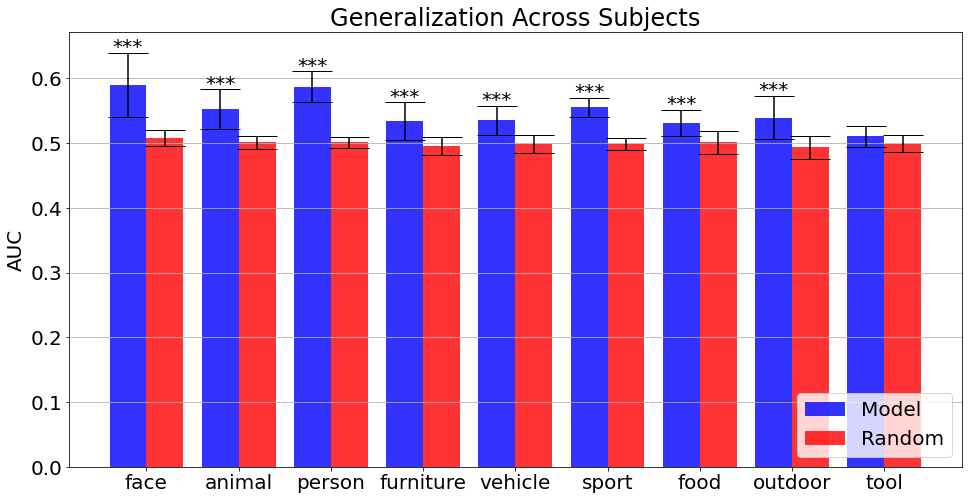

In [6]:
person = [0.62, 0.61, 0.58] + [0.58, 0.61, 0.57] + [0.55, 0.58, 0.54] + [0.61, 0.59, 0.6]
person_rand = [0.49, 0.49, 0.49] + [0.5, 0.5, 0.5] + [0.51, 0.5, 0.5] + [0.52, 0.5, 0.51]
face = [0.62, 0.62, 0.67] + [0.59, 0.61, 0.56] + [0.58, 0.68, 0.56] + [0.53, 0.53, 0.53]
face_rand = [0.51, 0.5, 0.5] + [0.5, 0.5, 0.5] + [0.5, 0.5, 0.5] + [0.52, 0.52, 0.54]
vehicle = [0.53, 0.54, 0.56] + [0.53, 0.57, 0.54] + [0.55, 0.55, 0.54] + [0.52, 0.5, 0.49]
vehicle_rand = [0.5, 0.5, 0.52] + [0.51, 0.5, 0.49] + [0.51, 0.47, 0.49] + [0.48, 0.5, 0.51]
outdoor = [0.57, 0.57, 0.61] + [0.55, 0.56, 0.48] + [0.52, 0.52, 0.51] + [0.53, 0.52, 0.53]
outdoor_rand = [0.48, 0.48, 0.54] + [0.5, 0.5, 0.5] + [0.49, 0.5, 0.49] + [0.47, 0.5, 0.47]
animal = [0.55, 0.6, 0.55] + [0.55, 0.55, 0.56] + [0.61, 0.57, 0.55] + [0.53, 0.5, 0.51]
animal_rand = [0.5, 0.5, 0.5] + [0.51, 0.49, 0.49] + [0.5, 0.48, 0.51] + [0.52, 0.5, 0.51]
sport = [0.54, 0.55, 0.57] + [0.56, 0.57, 0.58] + [0.55, 0.56, 0.57] + [0.54, 0.53, 0.54]
sport_rand = [0.5, 0.51, 0.5] + [0.5, 0.5, 0.49] + [0.49, 0.49, 0.5] + [0.48, 0.51, 0.51]
food = [0.55, 0.56, 0.53] + [0.56, 0.52, 0.56] + [0.53, 0.51, 0.52] + [0.51, 0.52, 0.5]
food_rand = [0.51, 0.5, 0.48] + [0.48, 0.51, 0.52] + [0.48, 0.48, 0.49] + [0.53, 0.51, 0.52]
furniture = [0.53, 0.57, 0.57] + [0.54, 0.57, 0.51] + [0.5, 0.5, 0.49] + [0.57, 0.52, 0.53]
furniture_rand = [0.5, 0.48, 0.51] + [0.46, 0.49, 0.49] + [0.51, 0.5, 0.49] + [0.5, 0.51, 0.5]
tool = [0.52, 0.52, 0.49] + [0.53, 0.51, 0.49] + [0.49, 0.5, 0.54] + [0.52, 0.51, 0.5]
tool_rand = [0.52, 0.49, 0.53] + [0.5, 0.49, 0.49] + [0.49, 0.5, 0.48] + [0.51, 0.49, 0.5]

names =['face', 'animal', 'person', 'furniture', 'vehicle', 'sport', 'food', 'outdoor', 'tool'] 
sub = [face, animal, person, furniture, vehicle, sport, food, outdoor, tool]
sub_rand = [face_rand, animal_rand, person_rand, furniture_rand, vehicle_rand, sport_rand, food_rand,outdoor_rand,tool_rand]

categories, categories_rand = sub, sub_rand
#categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
t_stat = stats.ttest_ind(sub[0], sub_rand[0]).statistic
pval = stats.ttest_ind(sub[0], sub_rand[0]).pvalue / 2
print("p-value:", pval)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'Generalization Across Subjects', 'lower right')


In [7]:
def build_subplot(categories, categories_rand, x_pos, names, title, leg_loc):
    plt.rc('font', size=16)
    fig, ax = plt.subplots(4,3)
    fig.set_size_inches(40, 30)
    for i in range(4):
        for j in range(3):
            k = i*3+j
            CTEs, CTEs_rand, error, error_rand, x_pos = process(categories[:,k:k+1], categories_rand[:,k:k+1], names)
            plt.yticks(np.arange(0, 1, 0.1))
            ax[i,j].bar(x_pos, CTEs, align='center', color='blue', alpha=0.8, ecolor='black', capsize=2, width=2)
            ax[i,j].bar(x_pos+2, CTEs_rand, align='center', color='red', alpha=0.8, ecolor='black', capsize=2, width=2)
            ax[i,j].set_ylabel('AUC')
            ax[i,j].set_xticks(x_pos+1)
            ax[i,j].set_xticklabels(names)
            #ax[i,j].set_title(title)  
            ax[i,j].yaxis.grid(True)
            #ax[i,j].legend(['Model', 'Random'], loc=leg_loc)
            ax[i,j].patches
    plt.show()
    return

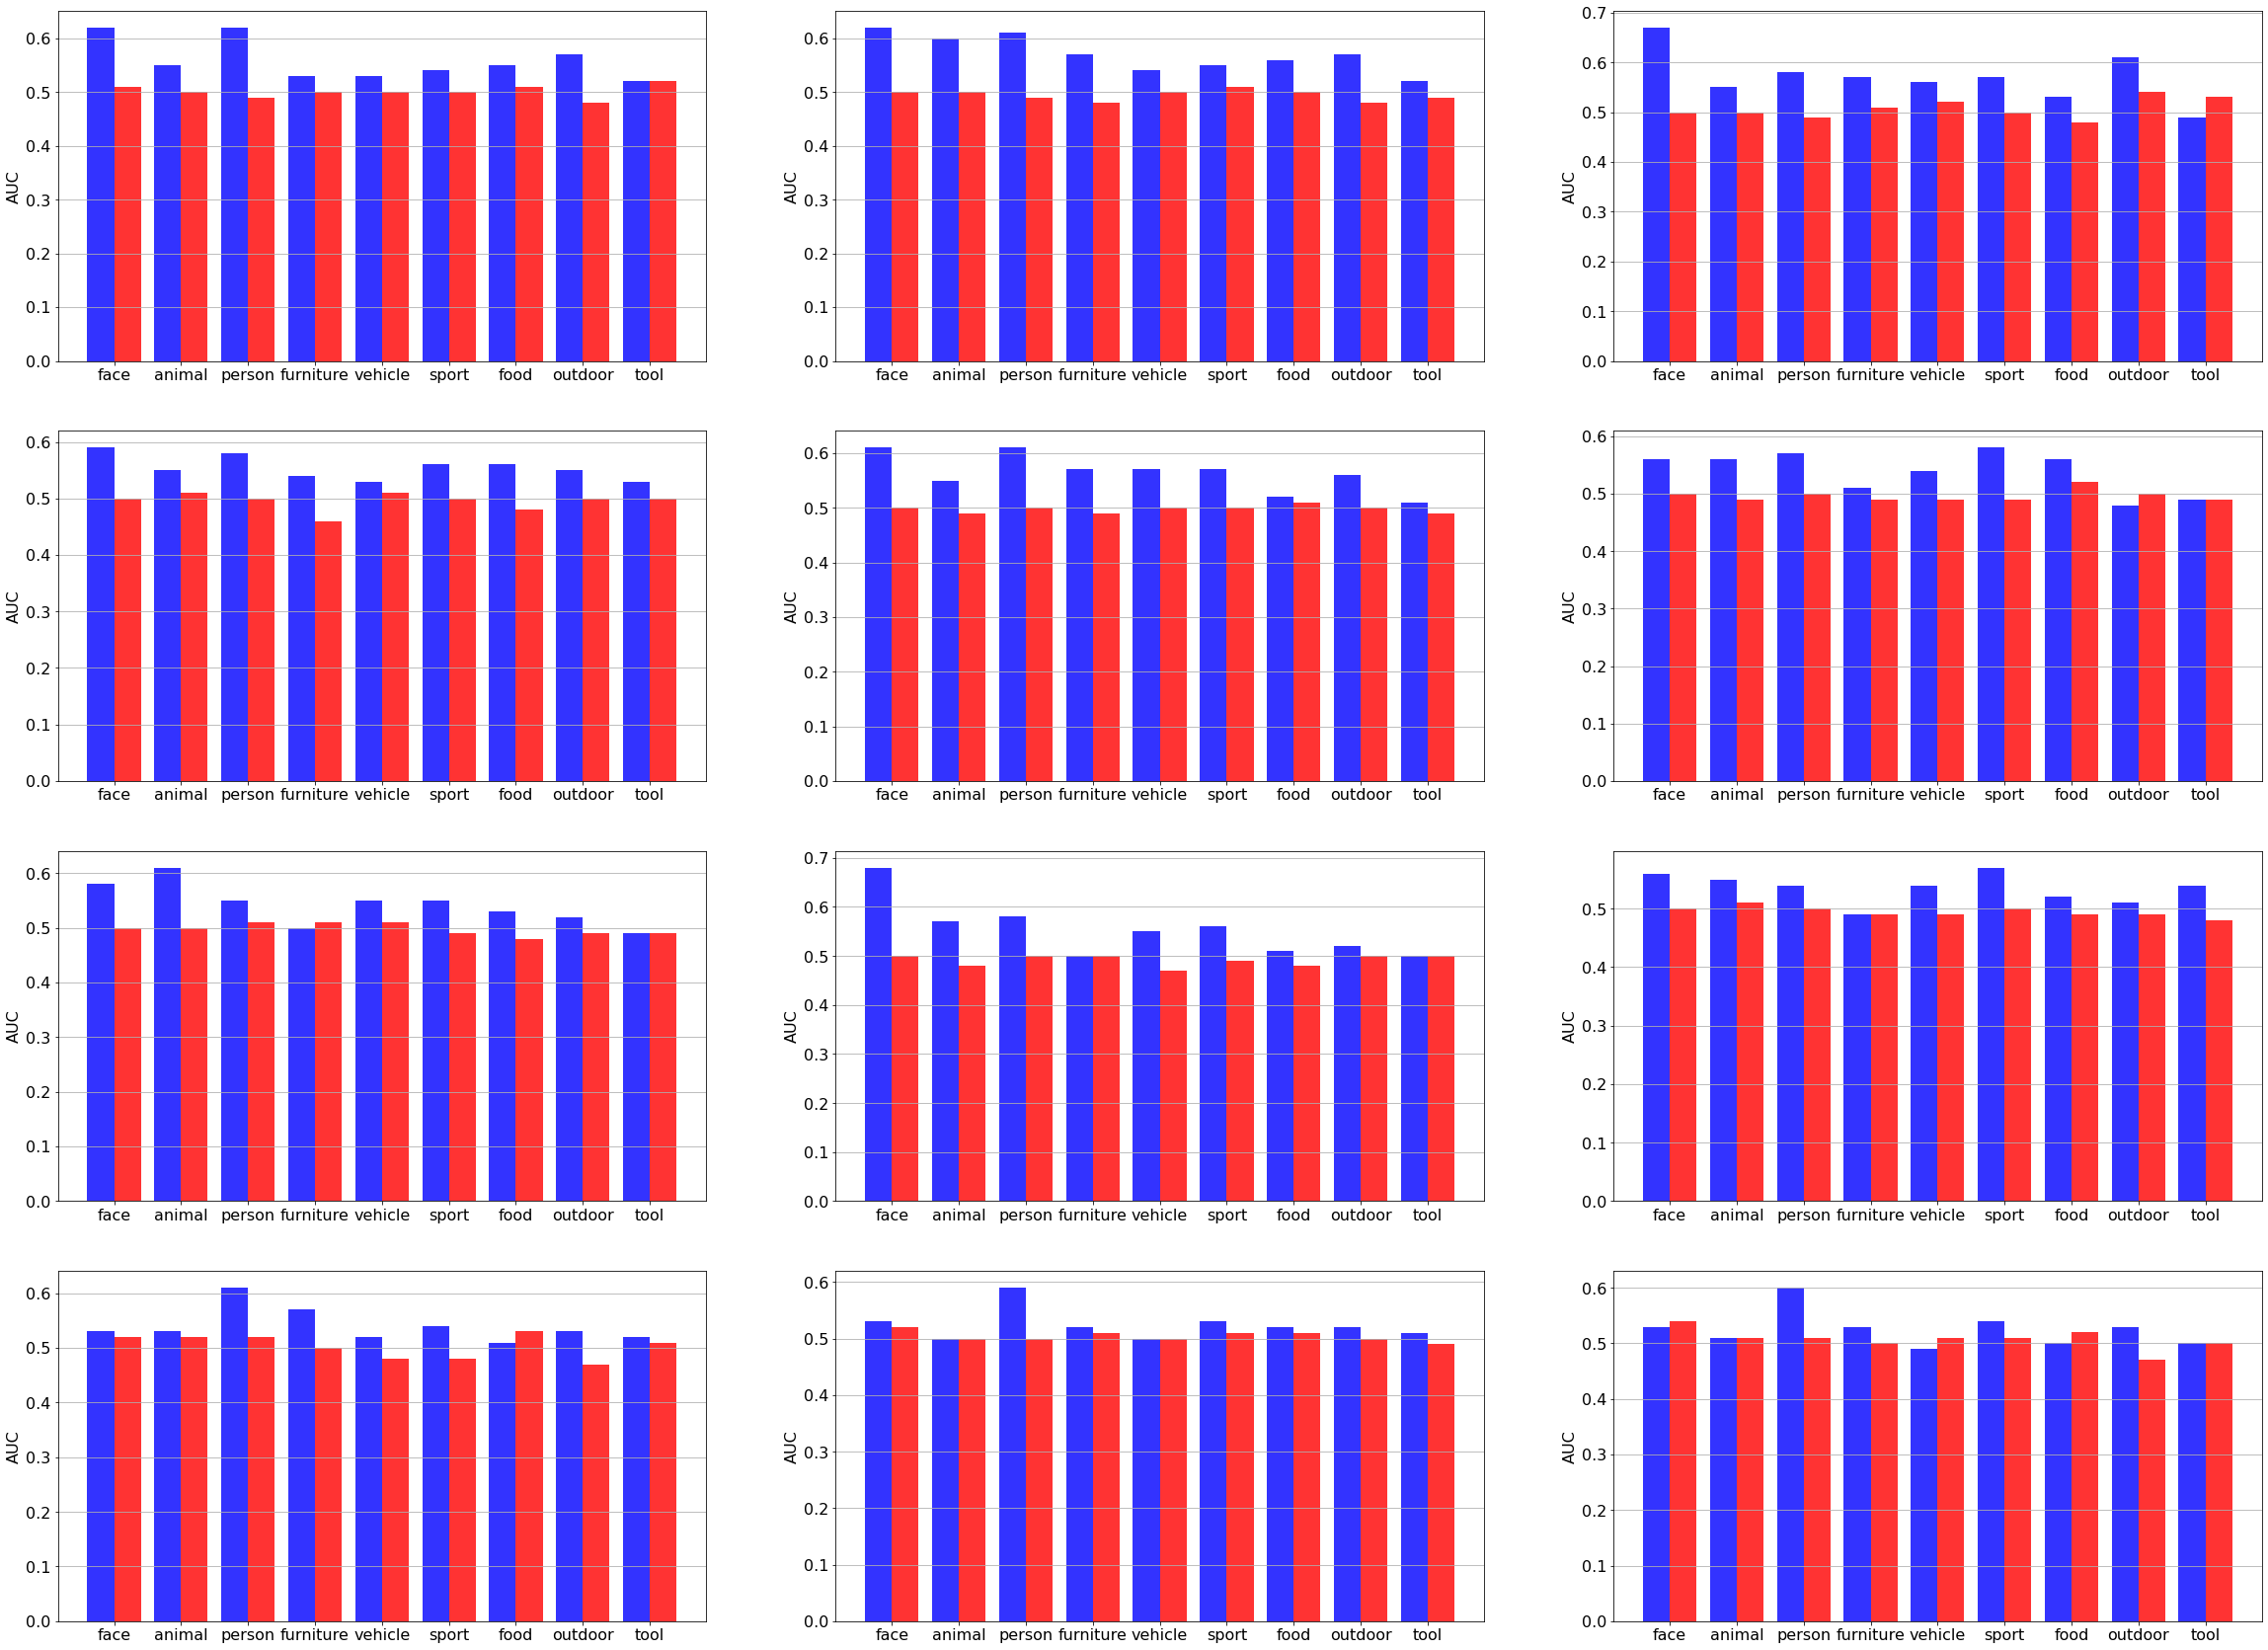

In [8]:
categories, categories_rand = np.array(sub), np.array(sub_rand)
#categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
build_subplot(categories, categories_rand, x_pos, names,
           'Generalization Across Subjects', 'upper right')